# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [7]:
# access yelp.csv using a relative path
import pandas as pd
df = pd.read_csv(r'C:/Users/tvolpe/Desktop/HW4_Linear_Regression/yelp.csv')

In [8]:
# show the first review
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [9]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary using using json.loads()
import json
with open('../HW4_Linear_Regression/yelp.json', 'r') as f:
    data = [json.loads(row) for row in f]

In [10]:
# print the first review
data[0]

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

In [11]:
# convert the list of dictionaries to a DataFrame
yelp_revs = pd.DataFrame(data)
yelp_revs.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"


In [12]:
# add DataFrame columns for cool, useful, and funny
# extract these values from the votes column
yelp_revs['cool'] = [row['votes']['cool'] for row in data]
yelp_revs['useful'] = [row['votes']['useful'] for row in data]
yelp_revs['funny'] = [row['votes']['funny'] for row in data]

In [13]:
# drop the votes column
# drop the votes column
yelp_revs.drop('votes', axis=1, inplace=True)
yelp_revs.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [14]:
# treat stars as a categorical variable and look for differences between groups
yelp_revs.groupby('stars').median()

,cool,useful,funny
stars,,,
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [15]:
yelp_revs.groupby('stars').mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


In [16]:
yelp_revs.groupby('stars').sum()

,cool,useful,funny
stars,,,
1,432,1202,791
2,667,1449,812
3,1152,1909,1015
4,3366,4922,2364
5,3151,4611,2031


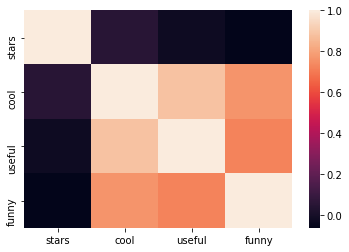

In [17]:
# create a correlation matrix
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp_revs.corr())

In [18]:
yelp = yelp_revs
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 3

Define cool/useful/funny as the features, and stars as the response to create your X and y

In [19]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
zip(feature_cols, linreg.coef_)

[('cool', 0.27435946858853105),
 ('useful', -0.1474523909940152),
 ('funny', -0.13567449053706168)]

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
import numpy as np

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# define a function that accepts a list of features and returns testing RMSE
# define a function that accepts a list of features and returns testing RMSE
def yelp_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [23]:
# calculate RMSE with all three feature
yelp_rmse(['cool', 'useful', 'funny'])

1.184290528216591

## Task 6

Try removing some of the features and see if the RMSE improves.

In [24]:
yelp_rmse(['cool', 'useful']) # 1.1962390876092979
yelp_rmse(['cool', 'funny']) # 1.1942673256493732
yelp_rmse(['useful', 'funny']) #1.2098272023900722

1.2098272023900722

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [25]:
# new feature: review length (number of characters)
yelp['length'] = yelp.text.apply(len)

In [26]:
yelp_rmse(['cool', 'useful', 'funny', 'length'])

1.1776383138726136

In [27]:
# new features: whether or not the review contains 'love' or 'hate'


In [28]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [29]:
# split the data (outside of the function)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

In [31]:
# fill the array with the mean of y_test
y_null.fill(y_test.mean())

In [32]:
# calculate null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2123276124876476

## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [33]:
# import and instantiate KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)

In [34]:
# classification models will automatically treat the response value (1/2/3/4/5) as unordered categories
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.3524


## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [35]:
# use linear regression to make continuous predictions
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [36]:
# round its predictions to the nearest integer
y_pred_class = y_pred.round()

In [37]:
# calculate classification accuracy of the rounded predictions
metrics.accuracy_score(y_test, y_pred_class)

0.3456

## Task 1 (Bonus)

Interact with JSON

In [38]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary using using json.loads()

In [39]:
# convert the list of dictionaries to a DataFrame

In [40]:
# add DataFrame columns for cool, useful, and funny

In [41]:
# drop the votes column